In [10]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import glob
from pandas import DataFrame as df
import numpy as np
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import datetime
from tqdm import tqdm

In [0]:
start=datetime.datetime.now()

In [13]:
items=glob.glob('/gdrive/My Drive/Capstone project images/segmented/Grape*/*.jpg',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']
data.drop(['Item','Folder'],axis=1,inplace=True)
data.head()

,Species,Disease,Image Path
0,Grape,healthy,/gdrive/My Drive/Capstone project images/segme...
1,Grape,healthy,/gdrive/My Drive/Capstone project images/segme...
2,Grape,healthy,/gdrive/My Drive/Capstone project images/segme...
3,Grape,healthy,/gdrive/My Drive/Capstone project images/segme...
4,Grape,healthy,/gdrive/My Drive/Capstone project images/segme...


In [14]:
data.groupby(['Disease']).nunique()

,Species,Disease,Image Path
Disease,,,
Black_rot,1,1,1180
Esca_(Black_Measles),1,1,1384
Leaf_blight_(Isariopsis_Leaf_Spot),1,1,1076
healthy,1,1,423


In [0]:
X=data.drop(['Species','Disease'],axis=1)
y=data['Disease']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [0]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [18]:
img_train=[]
for image in tqdm(X_train['Image Path']):
    img_train.append(cv2.imread(image,1))

100%|██████████| 2437/2437 [00:17<00:00, 139.13it/s]


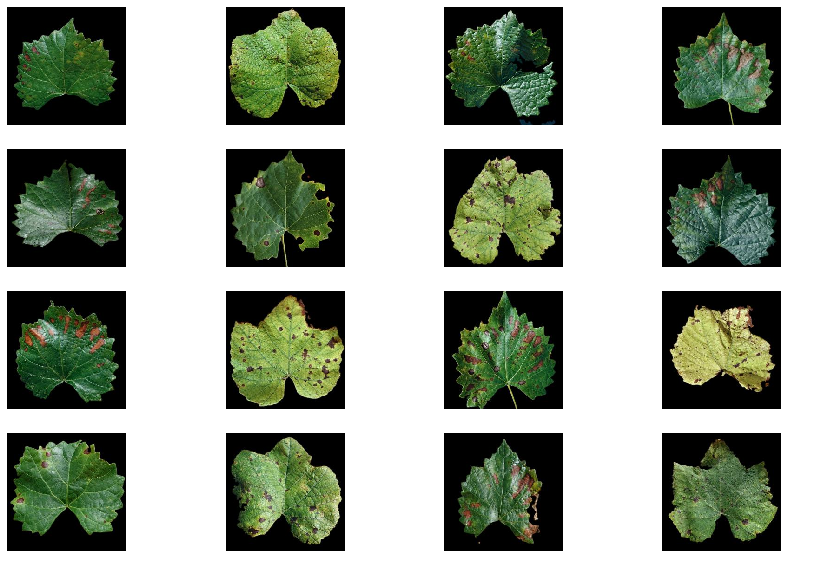

In [19]:
plt.figure(figsize=(15,10))
i=0
for img in img_train[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_train.iloc[i],color='w')
  i+=1
plt.show()

In [20]:
img_val=[]
for image in tqdm(X_val['Image Path']):
    img_val.append(cv2.imread(image,1))

100%|██████████| 813/813 [00:05<00:00, 161.12it/s]


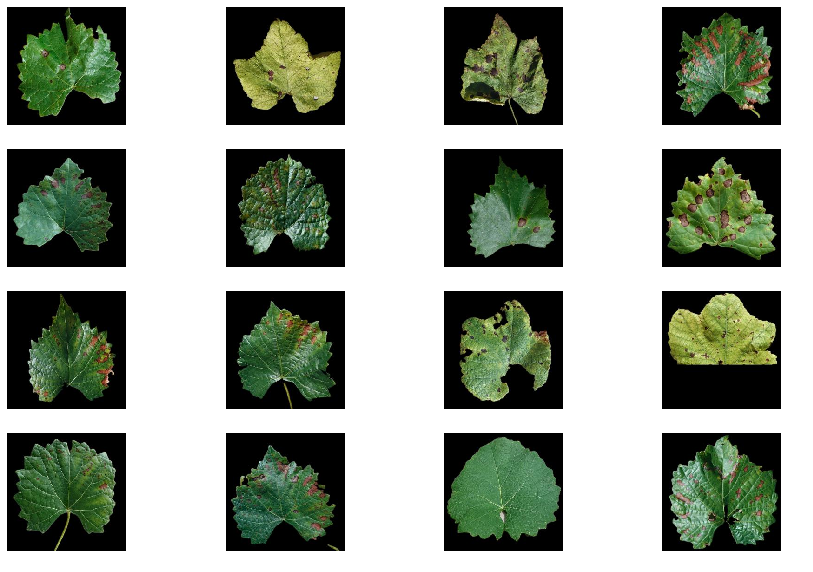

In [21]:
plt.figure(figsize=(15,10))
i=0
for img in img_val[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_val.iloc[i],color='w')
  i+=1
plt.show()

In [22]:
img_test=[]
for image in tqdm(X_test['Image Path']):
    img_test.append(cv2.imread(image,1))

100%|██████████| 813/813 [00:04<00:00, 172.44it/s]


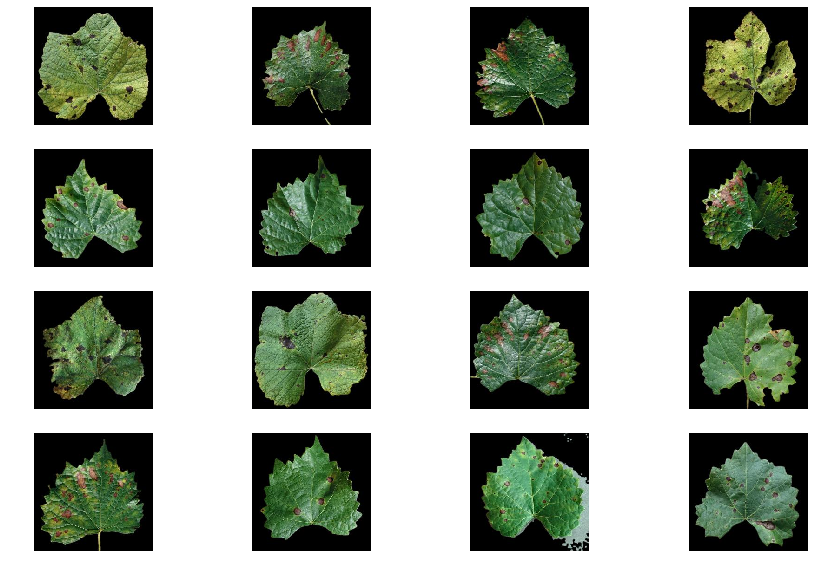

In [23]:
plt.figure(figsize=(15,10))
i=0
for img in img_test[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_test.iloc[i],color='w')
  i+=1
plt.show()

In [0]:
img_train=np.array(img_train)
img_val=np.array(img_val)
img_test=np.array(img_test)

In [25]:
train=img_train
train.shape

(2437, 256, 256, 3)

In [26]:
train.resize(train.shape[0],train.shape[1]*train.shape[2]*train.shape[3])
train.shape

(2437, 196608)

In [27]:
val=img_val
val.shape

(813, 256, 256, 3)

In [28]:
val.resize(val.shape[0],val.shape[1]*val.shape[2]*val.shape[3])
val.shape

(813, 196608)

In [29]:
test=img_test
test.shape

(813, 256, 256, 3)

In [30]:
test.resize(test.shape[0],test.shape[1]*test.shape[2]*test.shape[3])
test.shape

(813, 196608)

In [0]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [0]:
lr=LogisticRegression(class_weight='balanced')

In [33]:
lr.fit(train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
preds=lr.predict(val)

In [36]:
unique_elements, counts_elements = np.unique(preds, return_counts=True)
df(data=counts_elements,index=unique_elements,columns=['Count'])

,Count
Black_rot,244
Esca_(Black_Measles),276
Leaf_blight_(Isariopsis_Leaf_Spot),210
healthy,83


In [0]:
import pickle
#pickle.dump(lr, open('/gdrive/My Drive/Capstone project images/Logistic_Regression_Baseline_Segmented_Colab.sav', 'wb'))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

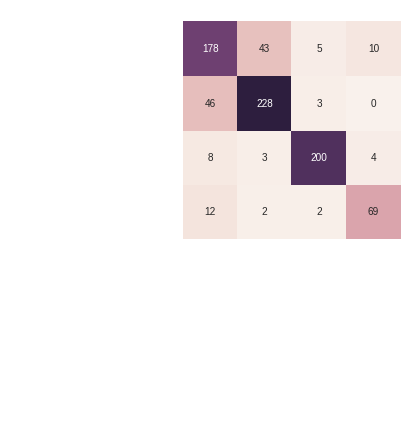

In [39]:
import seaborn as sns
label=['Black_rot','Esca_(Black_Measles)','Leaf_blight_(Isariopsis_Leaf_Spot)','healthy']
sns.heatmap(confusion_matrix(y_val,preds),annot=True,square=True,fmt='g',xticklabels=label,yticklabels=label,cbar=False)
for ticklabel in plt.gca().get_xticklabels():
    ticklabel.set_color('w')
for ticklabel in plt.gca().get_yticklabels():
    ticklabel.set_color('w')
plt.title('Confusion matrix',color='w')
plt.xlabel('Predicted',color='w')
plt.ylabel('True',color='w')
plt.show()

In [40]:
print(classification_report(y_val,preds))

                                    precision    recall  f1-score   support

                         Black_rot       0.73      0.75      0.74       236
              Esca_(Black_Measles)       0.83      0.82      0.82       277
Leaf_blight_(Isariopsis_Leaf_Spot)       0.95      0.93      0.94       215
                           healthy       0.83      0.81      0.82        85

                         micro avg       0.83      0.83      0.83       813
                         macro avg       0.83      0.83      0.83       813
                      weighted avg       0.83      0.83      0.83       813



In [41]:
print(datetime.datetime.now()-start)

0:15:10.793208
